# Health Canada COVID-19 Data Analysis

A collection of data analysis of Health Canada's COVID data.

## IMPORT - Modules and raw data

In [1]:
# Here, we'll use pandas for the analysis, and seaborn and matplotlib for plotting.

import pandas as pd

# These two libraries are for plotting data.
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data we're using from Health Canada.
canada_raw = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

display(canada_raw)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numteststoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,3,300.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,0,NaN,NaN,NaN,NaN,1,100.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,0,NaN,NaN,NaN,NaN,4,400.00,0.01,0.00,0.0,0.00,NaN,NaN,NaN,100.00,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,63,NaN,NaN,NaN,12.0,3,300.00,0.08,0.00,0.0,0.00,NaN,NaN,NaN,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,60,Yukon,Yukon,2022-01-26,1.0,3006,NaN,16.0,3006,NaN,9129,2823.0,93.91,NaN,212371.0,25,0.84,6992.97,37.22,0.0,0.53,NaN,0.0,27.0,5.56,167.0,388.50,491.0,1142.23,1.0,2.33,224.0,521.10,1.0,2.33,32.0,74.44,0.0,0.33,62.81
10358,61,Northwest Territories,Territoires du Nord-Ouest,2022-01-26,1.0,5295,NaN,15.0,5295,NaN,39529,4328.0,81.74,NaN,868693.0,175,3.42,11636.34,32.96,0.0,0.28,NaN,34.0,148.0,17.98,952.0,2092.12,1828.0,4017.23,3.0,6.59,923.0,2028.39,2.0,4.40,132.0,289.77,0.0,0.63,325.25
10359,62,Nunavut,Nunavut,2022-01-26,1.0,1487,NaN,5.0,1487,NaN,30088,1187.0,79.83,NaN,763597.0,48,3.34,3773.82,12.69,0.0,0.34,NaN,307.0,0.0,19.84,295.0,748.67,451.0,1144.58,1.0,2.54,245.0,621.78,0.0,0.00,35.0,88.83,0.0,0.00,0.00
10360,99,Repatriated travellers,Voyageurs rapatriés,2022-01-26,NaN,13,NaN,0.0,13,NaN,76,13.0,100.00,NaN,NaN,0,0.00,NaN,NaN,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN


## 2021/11/05 - Cases in Ontario

This chart idea was never made, but I'll keep it here as an idea anyways.

In [ ]:
# Get just Ontario's records.
ontario = canada_raw[canada_raw['prname'] == "Ontario"]

display(ontario)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numteststoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,3,300.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,35,Ontario,Ontario,2020-02-16,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
9,35,Ontario,Ontario,2020-02-21,NaN,3,0.0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
12,35,Ontario,Ontario,2020-02-24,NaN,4,0.0,0.0,4,NaN,0,NaN,NaN,NaN,NaN,1,33.33,0.03,0.00,0.0,0.00,NaN,NaN,NaN,100.00,4.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136,35,Ontario,Ontario,2021-11-06,1.0,602595,NaN,9896.0,602595,NaN,18963820,589166.0,97.77,NaN,1286057.0,508,0.08,4086.58,67.11,0.0,1.64,NaN,30187.0,370.0,0.59,3533.0,23.96,5450.0,36.96,51.0,0.35,2980.0,20.21,27.0,0.18,426.0,2.89,4.0,0.03,2.51
9151,35,Ontario,Ontario,2021-11-07,1.0,603231,NaN,9898.0,603231,NaN,18993965,589533.0,97.73,NaN,1288101.0,636,0.11,4090.89,67.12,2.0,1.64,NaN,30145.0,367.0,0.63,3800.0,25.77,5716.0,38.76,52.0,0.35,3276.0,22.22,27.0,0.18,468.0,3.17,4.0,0.03,2.49
9166,35,Ontario,Ontario,2021-11-08,1.0,603711,NaN,9900.0,603711,NaN,19021111,589771.0,97.69,NaN,1289942.0,480,0.08,4094.15,67.14,2.0,1.64,NaN,27146.0,238.0,0.67,4040.0,27.40,5870.0,39.81,54.0,0.37,3334.0,22.61,26.0,0.18,476.0,3.23,4.0,0.03,1.61
9181,35,Ontario,Ontario,2021-11-09,1.0,604152,NaN,9903.0,604152,NaN,19044091,590227.0,97.70,NaN,1291500.0,441,0.07,4097.14,67.16,3.0,1.64,NaN,22980.0,456.0,0.67,4022.0,27.28,6042.0,40.97,51.0,0.35,3444.0,23.36,22.0,0.15,492.0,3.34,3.0,0.02,3.09


In [ ]:
# Remove columns we don't need here and keep the number of cases reported today.
ontario_cases = ontario[['date', 'numtoday']]

# Create a rolling 7 day average to smooth the curve a bit.
ontario_cases['7day_average'] = ontario_cases['numtoday'].rolling(7).mean()

display(ontario_cases)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,numtoday,7day_average
0,2020-01-31,3,NaN
3,2020-02-08,0,NaN
6,2020-02-16,0,NaN
9,2020-02-21,0,NaN
12,2020-02-24,1,NaN
...,...,...,...
9136,2021-11-06,508,425.714286
9151,2021-11-07,636,468.000000
9166,2021-11-08,480,476.285714
9181,2021-11-09,441,492.000000


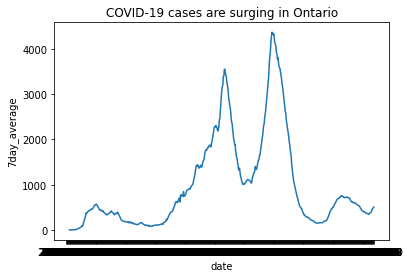

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.lineplot(data=ontario_cases, x='date', y='7day_average').set(title="COVID-19 cases are surging in Ontario")

plt.show()
plt.savefig("test.svg", format="svg")

## 2021/11/05 - Case rates across Canada

In [3]:
recent = canada_raw.sort_values(by='date', ascending=False).drop_duplicates(subset="prname")
recent = recent[['prname', 'ratetotal_last7']].set_index('prname').drop(['Repatriated travellers', 'Canada'])

display(recent)
recent.to_csv('')

,ratetotal_last7
prname,
New Brunswick,413.06
British Columbia,255.20
Alberta,488.08
Saskatchewan,745.27
Manitoba,364.87
Quebec,385.21
Newfoundland and Labrador,437.42
Ontario,275.25
Nova Scotia,353.00


FileNotFoundError: ignored

I took this code and put it into datawrapper to create a map.

Link [here](https://app.datawrapper.de/map/QIjuL/visualize#refine).

## 2021/11/10

In [ ]:
provinces = pd.pivot(canada_raw, columns="prname", index='date', values='numtotal')
provinces = provinces[provinces.index >= "2021-08-01"]

provinces["Atlantic"] = provinces["Prince Edward Island"] + provinces["Nova Scotia"] + provinces["New Brunswick"] + provinces["Newfoundland and Labrador"]

provinces = provinces.drop(["Repatriated travellers", "Canada", "Prince Edward Island", "Nova Scotia", "New Brunswick", "Newfoundland and Labrador"], axis=1)

display(provinces)

prname,Alberta,British Columbia,Manitoba,Northwest Territories,Nunavut,Ontario,Quebec,Saskatchewan,Yukon,Atlantic
date,,,,,,,,,,
2021-08-01,234765.0,150245.0,57654.0,128.0,657.0,550654.0,377644.0,50067.0,596.0,9915.0
2021-08-02,234912.0,150430.0,57669.0,128.0,657.0,550822.0,377798.0,50096.0,596.0,9918.0
2021-08-03,235038.0,150631.0,57691.0,129.0,657.0,550986.0,377973.0,50120.0,603.0,9935.0
2021-08-04,235244.0,150973.0,57702.0,129.0,657.0,551125.0,378157.0,50181.0,610.0,9943.0
2021-08-05,235641.0,151375.0,57739.0,129.0,657.0,551338.0,378462.0,50251.0,616.0,9960.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-06,326569.0,208818.0,64390.0,1886.0,674.0,602595.0,429319.0,78567.0,1017.0,16589.0
2021-11-07,326999.0,209280.0,64545.0,1886.0,674.0,603231.0,429864.0,78724.0,1017.0,16646.0
2021-11-08,327283.0,209703.0,64693.0,1886.0,674.0,603711.0,430395.0,78824.0,1017.0,16810.0


## 2021/11/30 - Death pie

In [ ]:
pie = canada_raw[canada_raw["date"] == "2021-11-29"]
pie = pie[["prname", "numdeaths"]]
pie = pie[pie["prname"] != "Repatriated travellers"].set_index("prname")

pie["% share"] = (pie["numdeaths"] / pie.at["Canada", "numdeaths"]) *100

display(pie)

,numdeaths,% share
prname,,
British Columbia,2333.0,7.863161
Alberta,3242.0,10.926862
Saskatchewan,926.0,3.120998
Manitoba,1315.0,4.432086
Ontario,9997.0,33.693967
Quebec,11576.0,39.015841
Newfoundland and Labrador,18.0,0.060667
New Brunswick,124.0,0.417931
Nova Scotia,110.0,0.370745


## 2021/12/03 - Ontario Road to 10K deaths

In [ ]:
deaths = canada_raw[canada_raw["prname"] == "Ontario"]
deaths = deaths[["date", "numdeaths", "numdeathstoday"]].set_index('date')
deaths["numdeathstoday"] = deaths["numdeathstoday"].rolling(7).mean()

for number in range(2500,10001,2500):
  name = "deaths_" + str(number)
  name = deaths[deaths["numdeaths"].between(number-2500, number)]
  deaths[number] = name["numdeathstoday"]

display(deaths)
deaths.to_csv('/content/drive/MyDrive/Data/exports/covid-ontariodeaths.csv')

,numdeaths,numdeathstoday,2500,5000,7500,10000
date,,,,,,
2020-01-31,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-08,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-16,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-21,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-24,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-25,9985.0,4.285714,NaN,NaN,NaN,4.285714
2021-11-26,9991.0,4.571429,NaN,NaN,NaN,4.571429
2021-11-27,9993.0,4.142857,NaN,NaN,NaN,4.142857


## 2021/12/06 - Cases (area chart)

In [ ]:
cases = canada_raw[["prname", "date", "numtotal"]]
cases = cases[~cases["prname"].isin(["Canada", "Repatriated travellers"])]


cases_pivot = pd.pivot(cases, columns="prname", index="date", values="numtotal").fillna(0)
cases_pivot["Atlantic"] = cases_pivot["New Brunswick"] + cases_pivot["Nova Scotia"] + cases_pivot["Prince Edward Island"] + cases_pivot["Newfoundland and Labrador"]
cases_pivot["Territories"] = cases_pivot["Yukon"] + cases_pivot["Nunavut"] + cases_pivot["Northwest Territories"]

cases_pivot = cases_pivot.drop(columns=["New Brunswick", "Nova Scotia", "Prince Edward Island", "Newfoundland and Labrador", "Yukon", "Nunavut", "Northwest Territories"])


display(cases_pivot)
cases_pivot.to_csv("/content/drive/MyDrive/Data/exports/covid/covid-cases_dec6.csv")

prname,Alberta,British Columbia,Manitoba,Ontario,Quebec,Saskatchewan,Atlantic,Territories
date,,,,,,,,
2020-01-31,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
2020-02-08,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0
2020-02-21,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0
2020-02-24,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-11-29,335009.0,218068.0,67753.0,617803.0,447387.0,80950.0,18919.0,4240.0
2021-11-30,335247.0,218426.0,67871.0,618490.0,448171.0,80992.0,19036.0,4248.0
2021-12-01,335677.0,218812.0,67999.0,619270.0,449367.0,81074.0,19172.0,4256.0


## 2021/12/15 - Ontario/Quebec

In [ ]:
onque = canada_raw[["prname", "date", "numactive"]]
onque = pd.pivot(onque, index="date", columns="prname", values="numactive")

onque["Atlantic"] = onque["New Brunswick"] + onque["Nova Scotia"] + onque["Prince Edward Island"] + onque["Newfoundland and Labrador"]
onque["Territories"] = onque["Yukon"] + onque["Nunavut"] + onque["Northwest Territories"]

onque = onque.drop(columns=["New Brunswick", "Nova Scotia", "Prince Edward Island", "Newfoundland and Labrador", "Yukon", "Nunavut", "Northwest Territories", "Repatriated travellers"])

display(onque)
onque.to_csv('/content/drive/MyDrive/Data/exports/covid/covid_onque_dec10.csv')

prname,Alberta,British Columbia,Canada,Manitoba,Ontario,Quebec,Saskatchewan,Atlantic,Territories
date,,,,,,,,,
2020-01-31,NaN,1.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-02-08,NaN,4.0,7.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-02-16,NaN,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-02-21,NaN,6.0,9.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-02-24,NaN,6.0,10.0,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-05,5041.0,3848.0,30626.0,1798.0,8115.0,10062.0,695.0,999.0,68.0
2021-12-06,4374.0,2978.0,29326.0,1613.0,8439.0,10272.0,634.0,956.0,60.0
2021-12-07,4105.0,2916.0,29200.0,1562.0,8479.0,10530.0,613.0,943.0,52.0


In [ ]:
onque = canada_raw[["prname", "date", "ratetotal_last7"]]
onque = pd.pivot(onque, index="date", columns="prname", values="ratetotal_last7")

onque["Atlantic"] = (onque["New Brunswick"] + onque["Nova Scotia"] + onque["Prince Edward Island"] + onque["Newfoundland and Labrador"]) / 4
onque["Territories"] = (onque["Yukon"] + onque["Nunavut"] + onque["Northwest Territories"]) / 3

onque = onque.drop(columns=["New Brunswick", "Nova Scotia", "Prince Edward Island", "Newfoundland and Labrador", "Yukon", "Nunavut", "Northwest Territories", "Repatriated travellers"])

display(onque)
onque.to_csv('/content/drive/MyDrive/Data/exports/covid/covid_onque_dec10.csv')

prname,Alberta,British Columbia,Canada,Manitoba,Ontario,Quebec,Saskatchewan,Atlantic,Territories
date,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-05,49.79,46.98,56.37,75.81,43.72,93.03,39.07,27.1025,56.250000
2021-12-06,48.86,47.21,57.79,78.92,44.39,98.07,38.99,27.9500,44.620000
2021-12-07,48.91,46.60,59.40,76.89,46.01,103.29,39.84,27.9975,40.010000


## 2021/12/17 - Worst days

In [ ]:
# provinces = canada_raw["prname"].unique().to_list()

# ls = []

# for prov in provinces:
#   this_prov = canada_raw[canada_raw["prname"] == prov]
#   today = this_prov[this_prov["date"] == "2021-12-17"]
#   worst = this_prov

worst = canada_raw.sort_values(["prname", "numtoday"], ascending=False).drop_duplicates("prname")
worst = worst[["prname", "date", "numtoday"]]
today = canada_raw[canada_raw["date"] == "2021-12-16"]
today = today[["prname", "date", "numtoday"]]

today["Province/Territory"] = today["prname"]

all = today.merge(worst, on="prname")
all = all[["Province/Territory", "numtoday_x", "date_y", "numtoday_y"]]
all["% of peak"] = all["numtoday_x"] / all["numtoday_y"] * 100

display(all)
all.to_csv('/content/drive/MyDrive/Data/exports/covid/worst_days_dec17.csv')

,Province/Territory,numtoday_x,date_y,numtoday_y,% of peak
0,British Columbia,753,2021-04-08,1293,58.236659
1,Alberta,473,2021-05-01,2433,19.441019
2,Saskatchewan,55,2021-10-07,650,8.461538
3,Manitoba,211,2021-05-20,597,35.343384
4,Ontario,2421,2021-04-16,4812,50.311721
5,Quebec,2736,2020-12-26,4492,60.908281
6,Newfoundland and Labrador,0,2021-02-11,100,0.000000
7,New Brunswick,177,2021-12-16,177,100.000000
8,Nova Scotia,92,2021-05-07,227,40.528634
9,Prince Edward Island,10,2021-12-15,11,90.909091


In [ ]:
country = canada_raw[canada_raw["prname"] == 'Canada']
country = country[["date", "numtoday", "numdeathstoday", ""]]
display(country)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numteststoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,0,NaN,NaN,NaN,NaN,4,400.00,0.01,0.00,0.0,0.00,NaN,NaN,NaN,100.00,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
5,1,Canada,Canada,2020-02-08,NaN,7,0.0,0.0,7,NaN,63,NaN,NaN,NaN,2.0,3,75.00,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,7.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
8,1,Canada,Canada,2020-02-16,NaN,8,0.0,0.0,8,NaN,109,NaN,NaN,NaN,3.0,1,14.29,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,8.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
11,1,Canada,Canada,2020-02-21,NaN,9,0.0,0.0,9,NaN,166,NaN,NaN,NaN,4.0,1,12.50,0.02,0.00,0.0,0.00,NaN,NaN,NaN,100.00,9.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
14,1,Canada,Canada,2020-02-24,NaN,10,0.0,0.0,10,NaN,212,NaN,NaN,NaN,6.0,1,11.11,0.03,0.00,0.0,0.00,NaN,NaN,NaN,100.00,10.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,1,Canada,Canada,2021-12-12,NaN,1836686,NaN,29926.0,1836686,NaN,50051754,1769337.0,96.33,NaN,1308676.0,4195,0.23,4802.28,78.25,12.0,1.63,NaN,105570.0,3455.0,2.04,37423.0,97.85,48876.0,127.79,283.0,0.74,27318.0,71.43,153.0,0.40,3903.0,10.20,22.0,0.06,9.03
9701,1,Canada,Canada,2021-12-13,NaN,1840920,NaN,29941.0,1840920,NaN,50147977,1774140.0,96.37,NaN,1311192.0,4234,0.23,4813.35,78.29,15.0,1.63,NaN,96223.0,4803.0,2.00,36839.0,96.32,50778.0,132.77,271.0,0.71,28676.0,74.98,141.0,0.37,4097.0,10.71,20.0,0.05,12.56
9716,1,Canada,Canada,2021-12-14,NaN,1845247,NaN,29969.0,1845247,NaN,50263570,1777480.0,96.33,NaN,1314214.0,4327,0.24,4824.67,78.36,28.0,1.62,NaN,115593.0,3340.0,2.05,37798.0,98.83,52753.0,137.93,283.0,0.74,30036.0,78.53,142.0,0.37,4291.0,11.22,20.0,0.05,8.73
9731,1,Canada,Canada,2021-12-15,NaN,1851056,NaN,29993.0,1851056,NaN,50364181,1780679.0,96.20,NaN,1316845.0,5809,0.31,4839.85,78.42,24.0,1.62,NaN,100611.0,3199.0,2.18,40384.0,105.59,55416.0,144.89,280.0,0.73,32315.0,84.49,142.0,0.37,4616.0,12.07,20.0,0.05,8.36


## 2021/12/22 - Quebec

In [ ]:
quebec = canada_raw[canada_raw["prname"] == "Quebec"]
quebec = quebec[["date", "numtoday"]]
quebec = quebec.append({"date": "2021-12-22", "numtoday": 6361}, ignore_index=True)
quebec["numtoday"] = quebec["numtoday"].rolling(7).mean()

display(quebec)
quebec.to_csv('/content/drive/MyDrive/Data/exports/covid/quebec_dec22.csv')

,date,numtoday
0,2020-03-01,NaN
1,2020-03-03,NaN
2,2020-03-05,NaN
3,2020-03-06,NaN
4,2020-03-07,NaN
...,...,...
654,2021-12-18,2521.285714
655,2021-12-19,2820.285714
656,2021-12-20,3240.714286
657,2021-12-21,3711.571429


## 2022/01/22 - Positivity Rate by Region

In [ ]:
canada = canada_raw[canada_raw["prname"] == "Canada"]
canada = canada[["date", "numtoday", "numteststoday"]]
canada["positiverate"] = canada["numtoday"] / canada["numteststoday"]
canada["positiverate_7days"] = canada["positiverate"].rolling(7).mean()

display(canada)
canada.to_csv('/content/drive/MyDrive/Data/exports/covid/canada_positive_rate.csv')

,date,numtoday,numteststoday,positiverate,positiverate_7days
2,2020-01-31,4,NaN,NaN,NaN
5,2020-02-08,3,NaN,NaN,NaN
8,2020-02-16,1,NaN,NaN,NaN
11,2020-02-21,1,NaN,NaN,NaN
14,2020-02-24,1,NaN,NaN,NaN
...,...,...,...,...,...
9956,2021-12-30,39830,152638.0,0.260944,0.195218
9971,2021-12-31,41223,101486.0,0.406194,0.240452
9986,2022-01-01,41548,96064.0,0.432503,0.288520
10001,2022-01-02,42006,15657.0,2.682889,0.659652


## 2021/01/14 - Canada hospitalizations

In [2]:
canada = canada_raw[canada_raw["prname"] == "Canada"]

canada = canada[["date", ""]]

KeyError: ignored

## 2022/01/20 - Atlantic Canada

In [ ]:
atlantic = canada_raw[canada_raw["prname"].isin(["Newfoundland and Labrador", "New Brunswick", "Nova Scotia", "Prince Edward Island", "Canada"])]
atlantic = pd.pivot(atlantic, index="date", columns="prname", values="rateactive")

atlantic_diff = atlantic.copy()

for label, content in atlantic.items():
  atlantic_diff[label] = atlantic[label] - atlantic["Canada"]

display(atlantic_diff)
atlantic_diff.to_csv('/content/drive/MyDrive/Data/exports/covid/atlantic_jan20.csv')

prname,Canada,New Brunswick,Newfoundland and Labrador,Nova Scotia,Prince Edward Island
date,,,,,
2020-01-31,0.0,NaN,NaN,NaN,NaN
2020-02-08,0.0,NaN,NaN,NaN,NaN
2020-02-16,0.0,NaN,NaN,NaN,NaN
2020-02-21,0.0,NaN,NaN,NaN,NaN
2020-02-24,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-01-15,0.0,-132.42,25.45,-234.69,298.53
2022-01-16,0.0,-327.83,61.95,-191.71,271.26
2022-01-17,0.0,-243.79,158.38,-288.49,309.09


## 2022/01/22 - All provinces

In [ ]:
today = canada_raw[canada_raw["date"] == "2022-01-19"]
today = today[["prname", "numtoday", "numdeaths"]].set_index("prname")

display(today)

,numtoday,numdeaths
prname,,
British Columbia,2387,2505.0
Alberta,3837,3413.0
Saskatchewan,1260,961.0
Manitoba,914,1478.0
Ontario,5744,10726.0
Quebec,6123,12541.0
Newfoundland and Labrador,511,28.0
New Brunswick,498,196.0
Nova Scotia,527,124.0


## 2022/01/30 - Canada time series deaths/cases

In [11]:
can = canada_raw[canada_raw["prname"] == "Canada"]
can["numactive_7day"] = can["numactive"].rolling(7).mean()
can["numdeaths_7day"] = can["numdeathstoday"].rolling(7).mean()
can = can[["date", "numactive_7day", "numdeaths_7day"]].dropna()

display(can)
can.to_csv('/content/drive/MyDrive/Data/exports/covid/canada_jan27.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,numactive_7day,numdeaths_7day
20,2020-02-26,8.714286,0.000000
23,2020-02-27,10.000000,0.000000
26,2020-02-29,11.142857,0.000000
30,2020-03-01,13.428571,0.000000
34,2020-03-03,16.857143,0.000000
...,...,...,...
10301,2022-01-22,322152.000000,148.428571
10316,2022-01-23,312632.571429,150.428571
10331,2022-01-24,303857.000000,158.142857
10346,2022-01-25,294989.285714,162.714286
